# Histogram Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@50987afc

This `Op` creates a one-dimensional image representing a histogram of all of the data values within a particular image. Let's see how `histogram` is called:

In [2]:
ij.op().help("histogram")

Available operations:
	(Histogram1d out) =
	net.imagej.ops.image.histogram.HistogramCreate(
		Iterable in,
		int numBins?)

Note that we can **(optionally)** specify a number of bins for the output histogrma. If we do not do so the `Op` will default to 256 bins.

The first thing that we have to do is retrieve an input image:

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


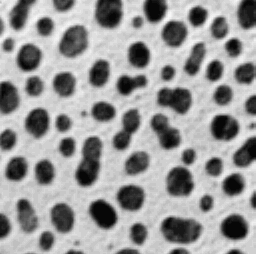

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/blobs.gif")

ij.notebook().display(input)

Now that we have an input image we can pass it through to `histogram`. We created a simple function to turn our one-dimensional histogram into a two-dimensional histogram for easier viewing:

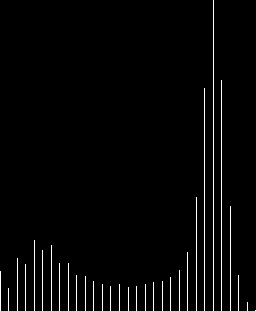

In [4]:
import net.imglib2.type.numeric.integer.UnsignedByteType
import net.imglib2.type.logic.BitType
import net.imglib2.histogram.Histogram1d

//histogram is the one-dimensional histogram of the data, 
//scale is the number of points that correspond to one pixel height on the output two-dimensional histogram
def twoDimensionHistogram(Histogram1d<UnsignedByteType> histogram, int scale) {
    
    maxValue = ij.op().stats().max(histogram)
    dims = [histogram.dimension(0), maxValue.get() / scale] as int[]
    output = ij.op().run("create.img", dims, new BitType())
    cursor = histogram.cursor()
    outputRA = output.randomAccess()
    while(cursor.hasNext()){
        value = cursor.next().get()
        outputRA.setPosition(cursor.getLongPosition(0), 0)
        outputRA.setPosition(output.dimension(1), 1)
        while(value > 0){
            outputRA.get().setOne()
            outputRA.move(-1, 1)
            value-= scale
        }
    }
    
    return output
}

histogram = ij.op().run("histogram", input)
scale = 100
histogram2D = twoDimensionHistogram(histogram, scale)

ij.notebook().display(histogram2D)

Note that blobs is a 5 bit image scaled up to 8 bits, causing most of the bins to show zero (since each value in blobs is a multiple of eight)